<a href="https://colab.research.google.com/github/Chandusatyasai/Chandusatyasai/blob/main/restaurant_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:

np.random.seed(42)

n = 500

data = pd.DataFrame({
    'name': np.random.choice(['Burger Palace', 'Pizza Hub', 'Sushi Zen', 'Curry Corner'], n),
    'location': np.random.choice(['Delhi', 'Mumbai', 'Bangalore', 'Chennai'], n),
    'votes': np.random.randint(0, 5000, n),
    'cost_for_two': np.random.randint(200, 2000, n),
    'cuisine': np.random.choice(['North Indian', 'South Indian', 'Chinese', 'Italian'], n),
    'online_order': np.random.choice(['Yes', 'No'], n),
    'book_table': np.random.choice(['Yes', 'No'], n),
    'delivery_time': np.random.randint(20, 90, n),
    'aggregate_rating': np.round(np.random.uniform(2.5, 5.0, n), 1)
})

data.head()


,name,location,votes,cost_for_two,cuisine,online_order,book_table,delivery_time,aggregate_rating
0,Sushi Zen,Bangalore,2508,1342,North Indian,Yes,No,43,2.5
1,Curry Corner,Delhi,2779,595,South Indian,Yes,Yes,49,3.4
2,Burger Palace,Delhi,924,1755,South Indian,Yes,Yes,77,2.6
3,Sushi Zen,Chennai,2956,460,North Indian,No,Yes,50,3.5
4,Sushi Zen,Bangalore,1581,1004,South Indian,Yes,No,83,3.8


In [20]:

label_encoders = {}

for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [21]:
X = data.drop('aggregate_rating', axis=1)
y = data['aggregate_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 1.25
Root Mean Squared Error: 1.12
R² Score: -1.59


<ipython-input-24-4107a06e58d0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette="coolwarm")


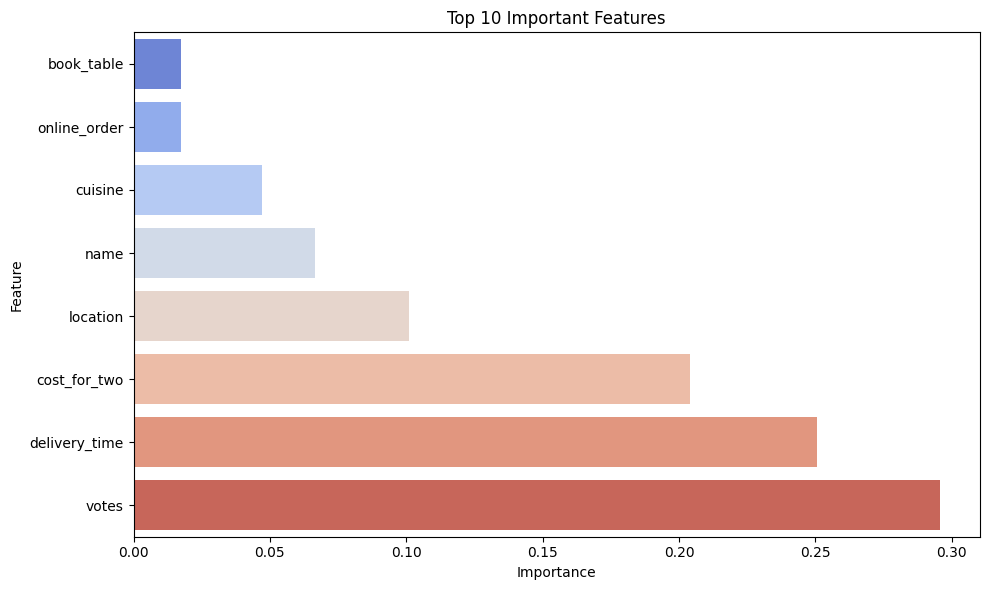

In [24]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]  # Top 10

plt.figure(figsize=(10, 6))
plt.title('Top 10 Important Features')
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette="coolwarm")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
